**Machine Learning - CE-I**



In [1]:
import pandas as pd
from sklearn.datasets import load_digits
# creating an object
digits = load_digits()

In [2]:
# all the properties and methods of 'digits' object
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
print(digits.images[1])
print(digits.target_names[1])

[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]
1


<Figure size 432x288 with 0 Axes>

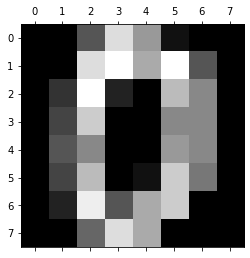

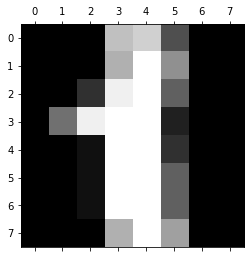

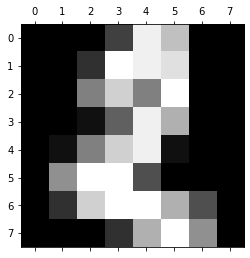

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.gray()
for i in range(3):
  plt.matshow(digits.images[i])

In [5]:
# digits data is 2d array of numbers
len(digits.data[:3][0])

64

In [6]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [7]:
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop(['target'], axis='columns'),digits.target, test_size=0.3)

In [9]:
# ensemble term is used when we use multiple algorithms to predict the outcomes
# here we are building multiple decision trees
# taking majority vote in case of classification and average incase of regression
from sklearn.ensemble import RandomForestClassifier
# creating an RandomForestClassifier Object
model = RandomForestClassifier(n_estimators=50)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

**n_estimators** : int, default=100 (10-100)
The number of trees in the forest.

**max_features** : {“auto”, “sqrt”, “log2”}, int or float, **default=”auto”**

The number of features to consider when looking for the best split:

If **int**, then consider **max_features** features at each split.

If **float**, then max_features is a fraction and round(max_features * n_features) features are considered at each split.

If **“auto”**, then** max_features=sqrt(n_features)**.

If **“sqrt”**, then **max_features=sqrt(n_features)** (same as “auto”).

If **“log2”**, then **max_features=log2(n_features)**.

If **None**, then **max_features=n_features**.

In [10]:
model.score(x_test, y_test)

0.9574074074074074

In [11]:
y_predicted = model.predict(x_test)

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[45,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 49,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 52,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 51,  0,  2,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 55,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 56,  1,  0,  0,  2],
       [ 0,  1,  0,  0,  1,  0, 57,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 51,  0,  1],
       [ 0,  4,  2,  0,  1,  1,  0,  0, 51,  0],
       [ 0,  0,  0,  0,  1,  2,  0,  0,  0, 50]])

Text(69.0, 0.5, 'Truth')

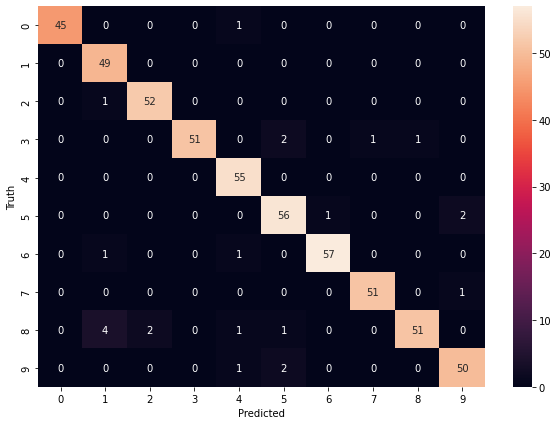

In [13]:
import seaborn as sb
plt.figure(figsize=(10,7))
sb.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [14]:
x_test.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
882,0.0,0.0,1.0,12.0,8.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,1.0,14.0,16.0,11.0,1.0,0.0
1656,0.0,0.0,3.0,9.0,14.0,9.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,2.0,15.0,7.0,0.0,0.0,0.0
769,0.0,0.0,4.0,15.0,7.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,2.0,9.0,12.0,3.0,0.0,0.0
439,0.0,0.0,3.0,9.0,14.0,7.0,0.0,0.0,0.0,3.0,...,7.0,0.0,0.0,0.0,0.0,10.0,15.0,10.0,0.0,0.0
1655,0.0,0.0,8.0,16.0,16.0,12.0,0.0,0.0,0.0,0.0,...,8.0,1.0,0.0,0.0,11.0,16.0,16.0,16.0,12.0,1.0


Enter index:2


<Figure size 432x288 with 0 Axes>

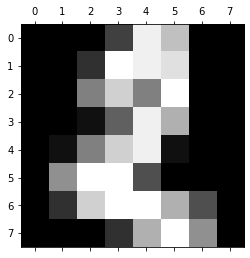

[2]


In [18]:
i = int(input("Enter index:"))
plt.gray()
plt.matshow(x_test.loc[[i]].to_numpy().reshape(8, 8))
plt.show()
print(model.predict(x_test.loc[[i]]))